In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [40]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [2]:
gta = pd.read_csv("globalterrorism.csv", encoding='ISO-8859-1', usecols=[1,8,10,11,13,14,29,35,58,82,98,101])

In [3]:
gta.shape

(170350, 12)

In [4]:
gta.columns

Index(['iyear', 'country_txt', 'region_txt', 'provstate', 'latitude',
       'longitude', 'attacktype1_txt', 'targtype1_txt', 'gname',
       'weaptype1_txt', 'nkill', 'nwound'],
      dtype='object')

In [5]:
gta.rename(columns={'iyear':'year', 'country_txt':'country', 'region_txt':'region', 'attacktype1_txt':'attack_type', 'targtype1_txt':'target_type', 'gname':'group',
       'weaptype1_txt':'weapon_type', 'nkill':'killed', 'nwound':'wounded'}, inplace=True)

In [6]:
gta.columns

Index(['year', 'country', 'region', 'provstate', 'latitude', 'longitude',
       'attack_type', 'target_type', 'group', 'weapon_type', 'killed',
       'wounded'],
      dtype='object')

In [7]:
gta.isnull().any().any()

True

In [8]:
gta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 12 columns):
year           170350 non-null int64
country        170350 non-null object
region         170350 non-null object
provstate      155848 non-null object
latitude       165744 non-null float64
longitude      165744 non-null float64
attack_type    170350 non-null object
target_type    170350 non-null object
group          170350 non-null object
weapon_type    170350 non-null object
killed         160668 non-null float64
wounded        155025 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 15.6+ MB


In [9]:
gta[['killed','wounded']] = gta[['killed','wounded']].fillna(0, axis=1)

In [10]:
gta['casuality'] = gta['killed'] + gta['wounded']

In [11]:
gta.head()

,year,country,region,provstate,latitude,longitude,attack_type,target_type,group,weapon_type,killed,wounded,casuality
0,1970,Dominican Republic,Central America & Caribbean,NaN,18.456792,-69.951164,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0,1.0
1,1970,Mexico,North America,NaN,19.432608,-99.133207,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,0.0
2,1970,Philippines,Southeast Asia,Tarlac,15.478598,120.599741,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,1.0
3,1970,Greece,Western Europe,Attica,37.983773,23.728157,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives/Bombs/Dynamite,0.0,0.0,0.0
4,1970,Japan,East Asia,NaN,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0.0,0.0,0.0


**World EDA**

In [12]:
def generalCountPlot(x=None, data=None, pattel='autumn'):
    plt.figure(figsize=(12,7))
    plt.xticks(rotation=90)
    sns.countplot(x=x, data=data, palette=pattel)

In [13]:
def generalBarPlot(x=None, y=None, data=None, color='Paired', estimator=np.mean):
    plt.figure(figsize=(12,7))
    plt.xticks(rotation=90)
    sns.barplot(x=x, y=y, data=data, palette=color, estimator=estimator)

In [14]:
def generalPointPlot(x=None, y=None, data=None, color='Paired', estimator=np.mean, hue=None):
    plt.figure(figsize=(12,7))
    plt.xticks(rotation=90)
    sns.pointplot(x=x, y=y, data=data, palette=color, estimator=estimator, hue=hue)

In [82]:
# casuality = gta[gta.year == 2016].groupby('country')['casuality'].sum()[:15]
# data = dict(type='choropleth',
#             colorscale = 'YIOrRd',
#             locations = gta[gta.year == 2016]['country'],
#             z = casuality.values.tolist(),
#             locationmode = 'country names',
#             text = gta[gta.year == 2016]['country'],
#             marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
#             colorbar = {'title':"Casuality"}
#             ) 
# layout = dict(title = '2014_World_Power_Consumption',
#               geo = dict(scope='world',
#                          showlakes = True,
#                          lakecolor = 'rgb(85,173,240)')
#              )
# # print(casuality)

In [83]:
# choromap = go.Figure(data =[data], layout=layout)
# iplot(choromap,validate=False)

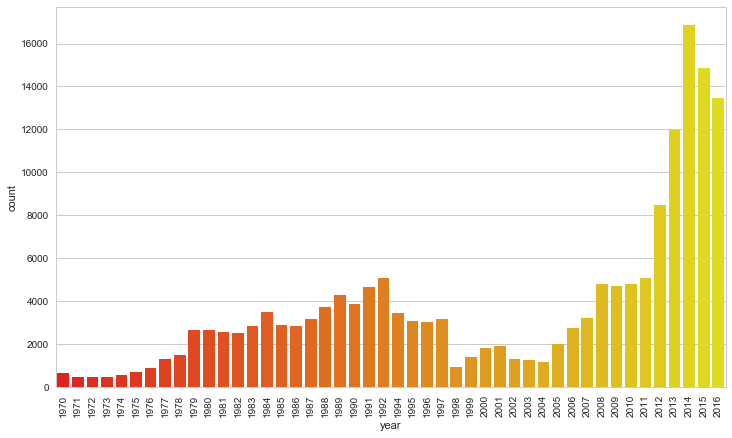

In [15]:
generalCountPlot('year', gta)

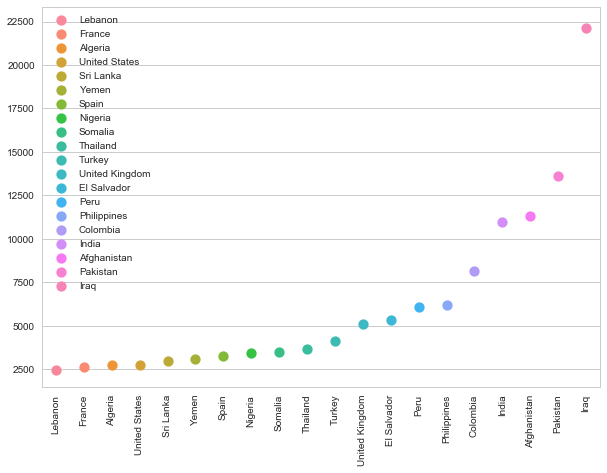

In [16]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
temp_value = gta.country.value_counts().sort_values(ascending=True)[-20:]
sns.pointplot(x=temp_value.index, y=temp_value.values, hue=temp_value.index, estimator=np.sum, orient="v")

In [17]:
region_country_group = gta.groupby(['region'])

In [18]:
def region_base_attack(regionName, color='winter'):
    region = region_country_group.get_group(regionName)['country']
    plt.figure(figsize=(10,7))
    plt.xticks(rotation=90)
    sns.countplot(x=region, palette=color)

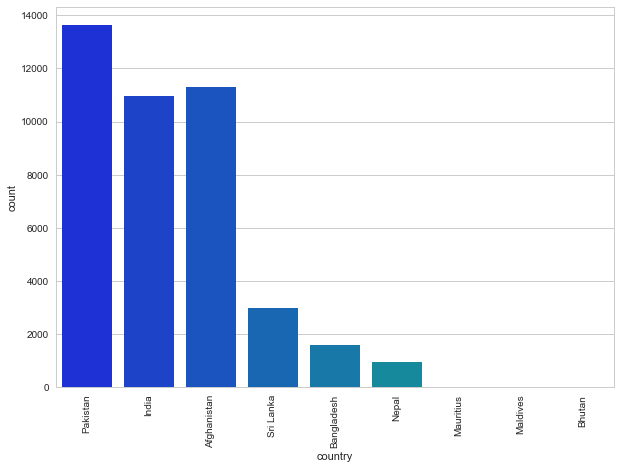

In [19]:
region_base_attack('South Asia')

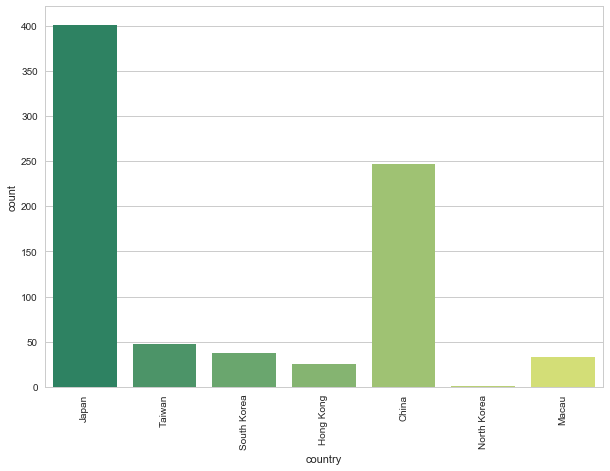

In [20]:
region_base_attack('East Asia', 'summer')

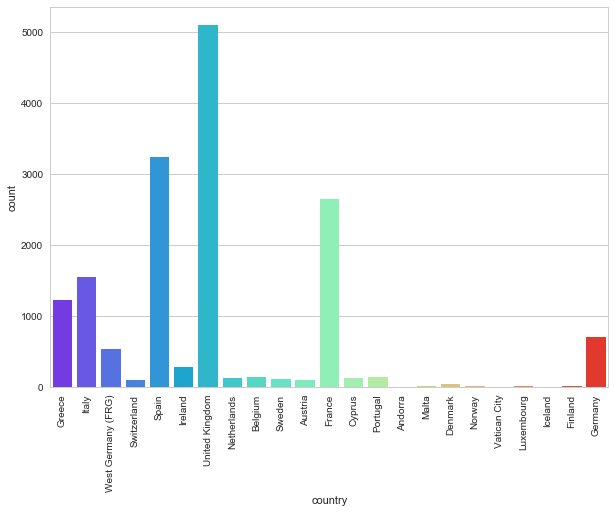

In [21]:
region_base_attack("Western Europe", 'rainbow')

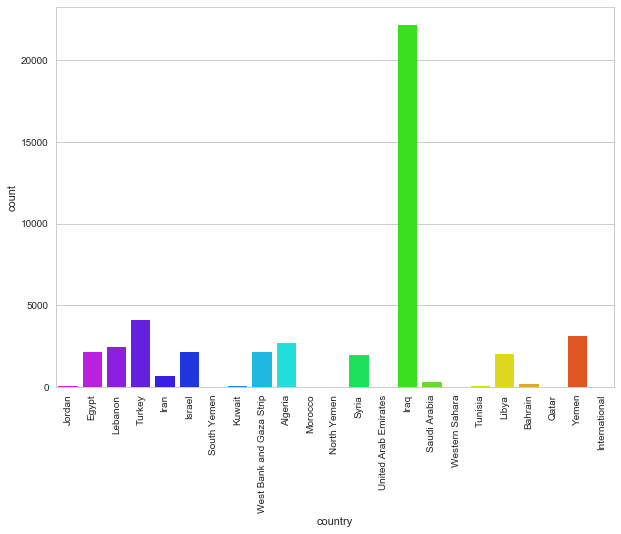

In [22]:
region_base_attack("Middle East & North Africa", "gist_rainbow_r")

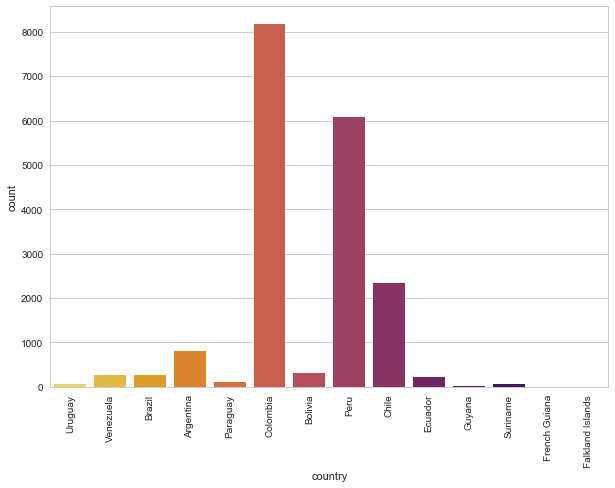

In [23]:
region_base_attack('South America', "inferno_r")

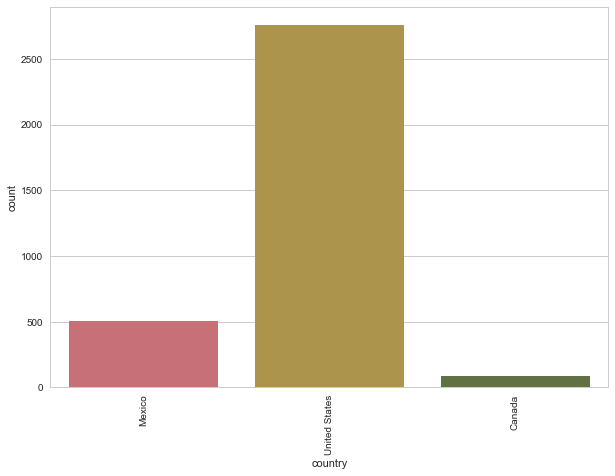

In [24]:
region_base_attack('North America', "tab20b_r")

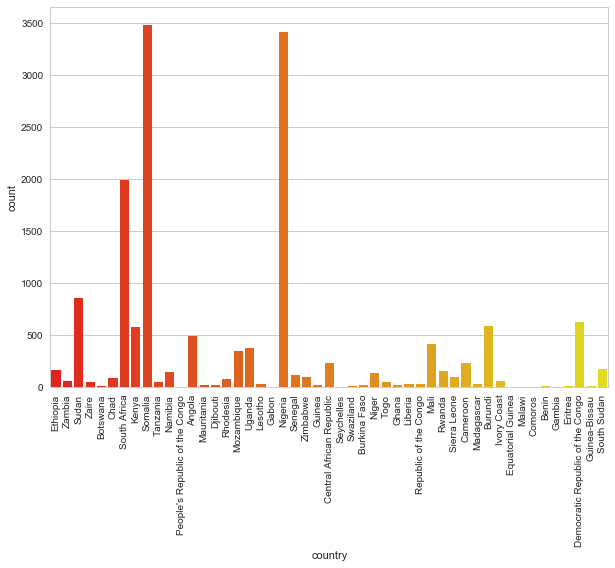

In [25]:
region_base_attack("Sub-Saharan Africa", "autumn")

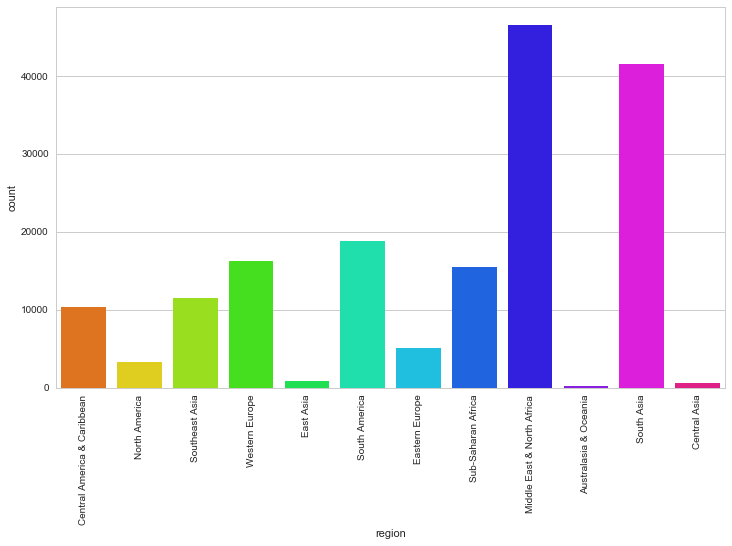

In [26]:
generalCountPlot('region', gta, "hsv")

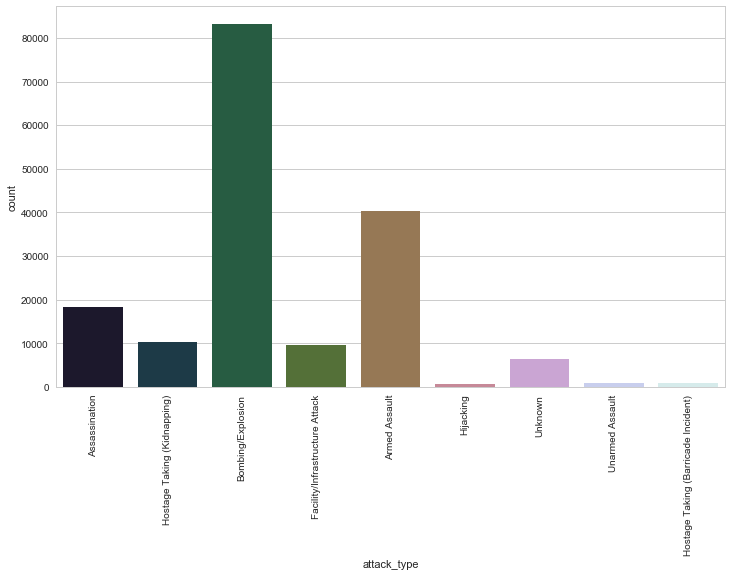

In [27]:
generalCountPlot('attack_type', gta, "cubehelix")

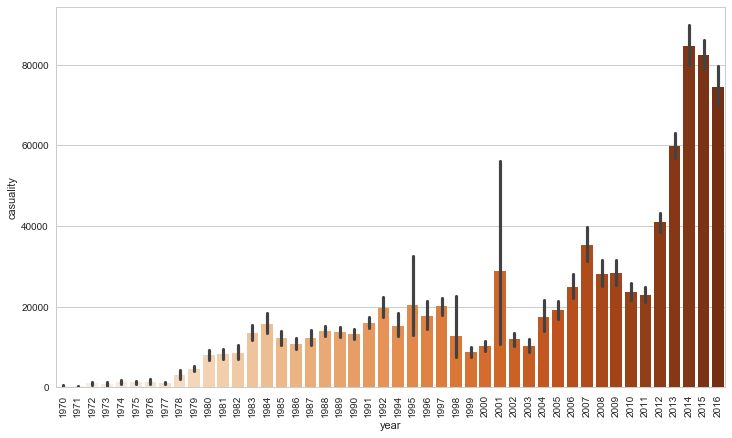

In [28]:
generalBarPlot(x='year', y='casuality', data=gta, color="Oranges", estimator=np.sum)

In [ ]:
sns.distplot(gta.year, kde=False, bins=5 )
plt.xlim(1970, 2017, 5)

** India EDA **

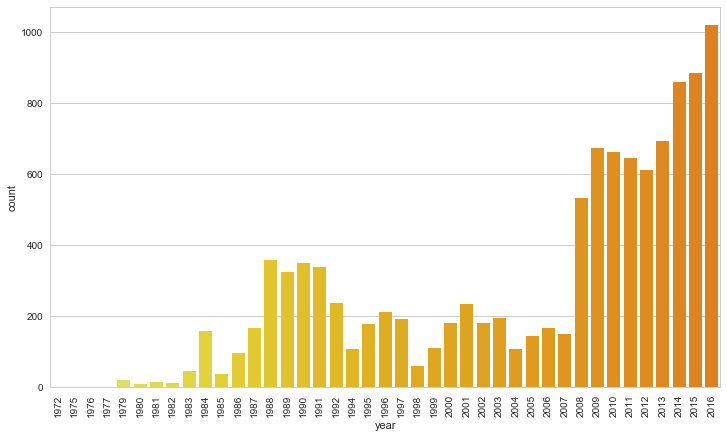

In [29]:
generalCountPlot('year',gta[gta.country == 'India'],"Wistia" )

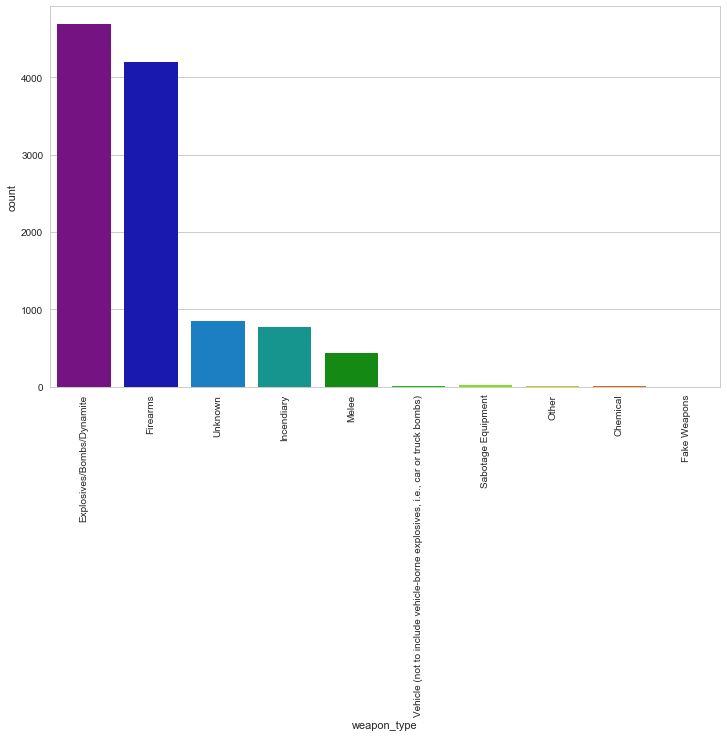

In [30]:
generalCountPlot('weapon_type',gta[gta.country == 'India'],"nipy_spectral" )

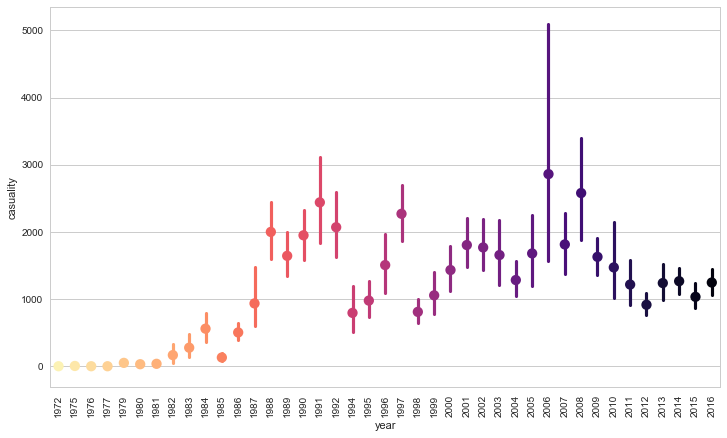

In [31]:
generalPointPlot('year', 'casuality', gta[gta.country == 'India'],"magma_r" , np.sum)

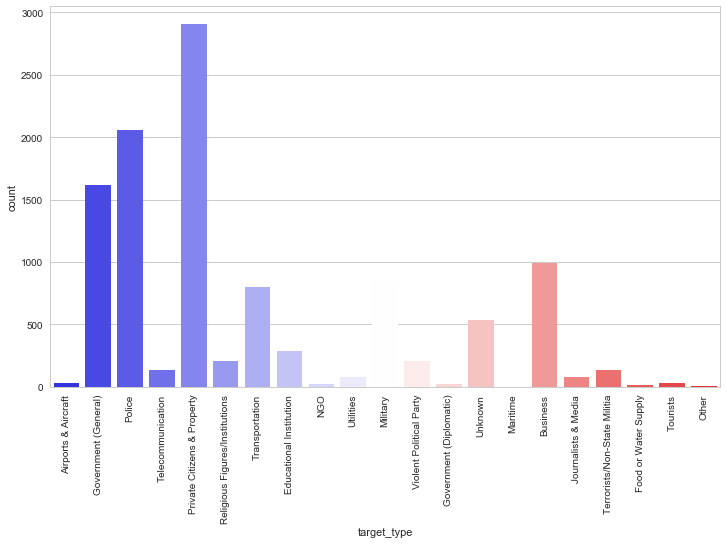

In [32]:
generalCountPlot('target_type', gta[gta.country == 'India'],"bwr")

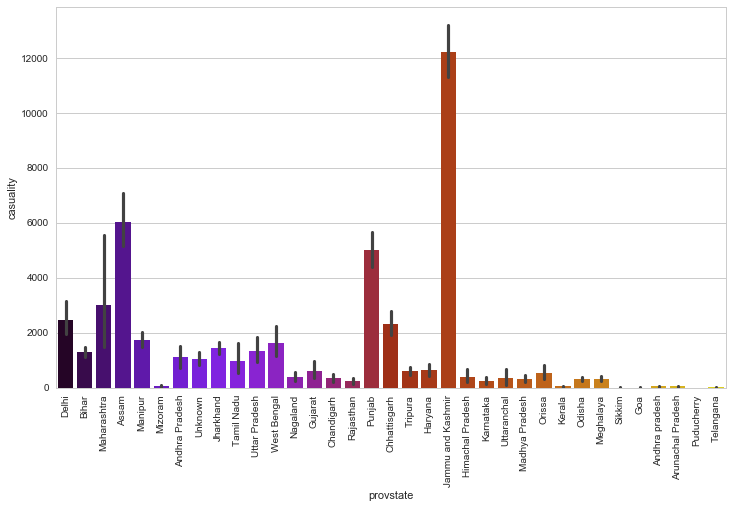

In [33]:
generalBarPlot('provstate', 'casuality', gta[gta.country == 'India'],"gnuplot" , np.sum)

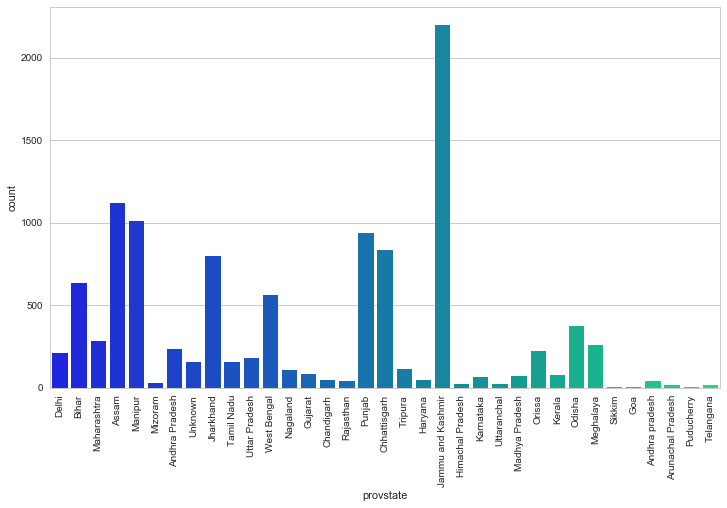

In [34]:
generalCountPlot('provstate', gta[gta.country == 'India'],"winter")

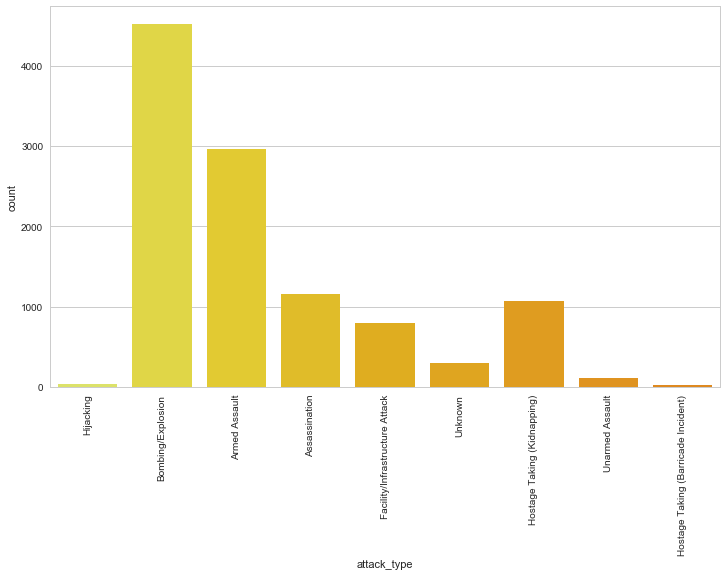

In [35]:
generalCountPlot('attack_type', gta[(gta.country == 'India')], 'Wistia')

**Inda EDA 2010-16 **

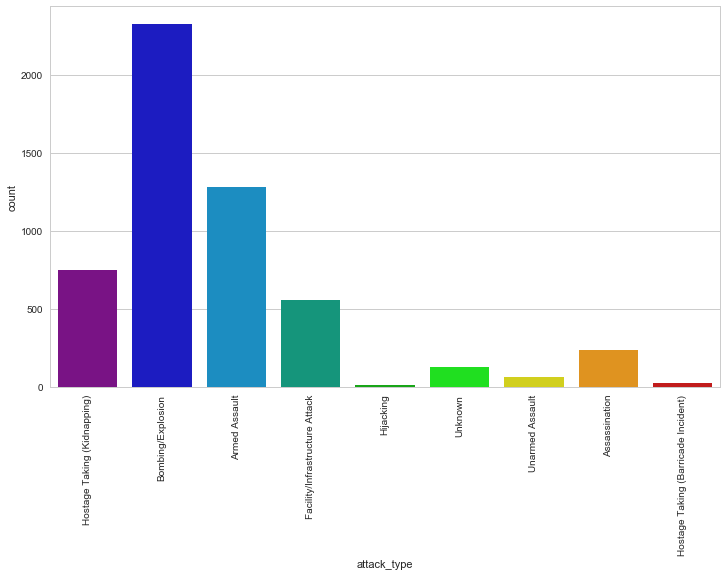

In [36]:
generalCountPlot('attack_type', gta[(gta.country == 'India') & (gta.year.between(2010, 2016, inclusive=True))], 'nipy_spectral')

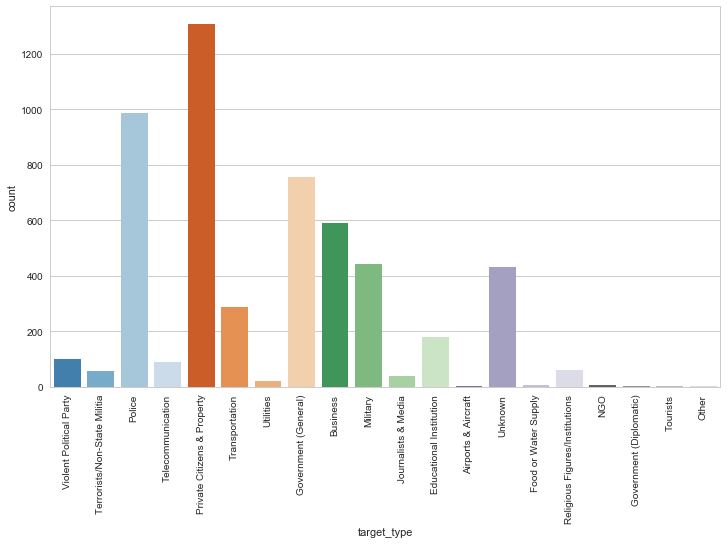

In [37]:
generalCountPlot('target_type', gta[(gta.country == 'India') & (gta.year.between(2010, 2016, inclusive=True))],"tab20c")

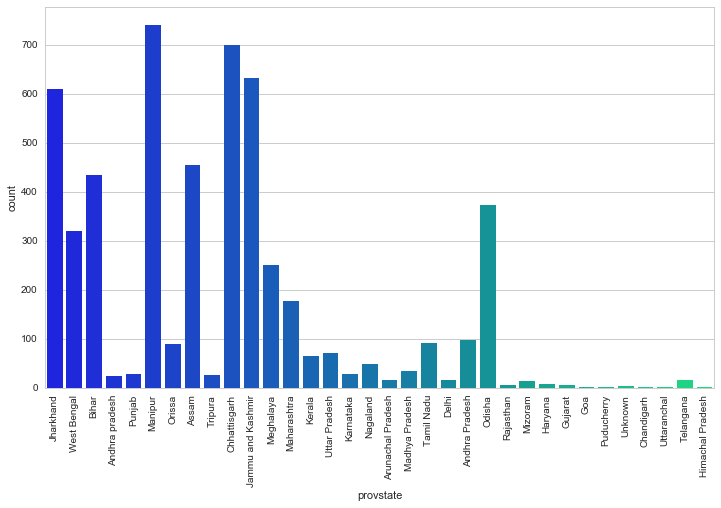

In [38]:
generalCountPlot('provstate', gta[(gta.country == 'India') & (gta.year.between(2010, 2016, inclusive=True))],"winter")

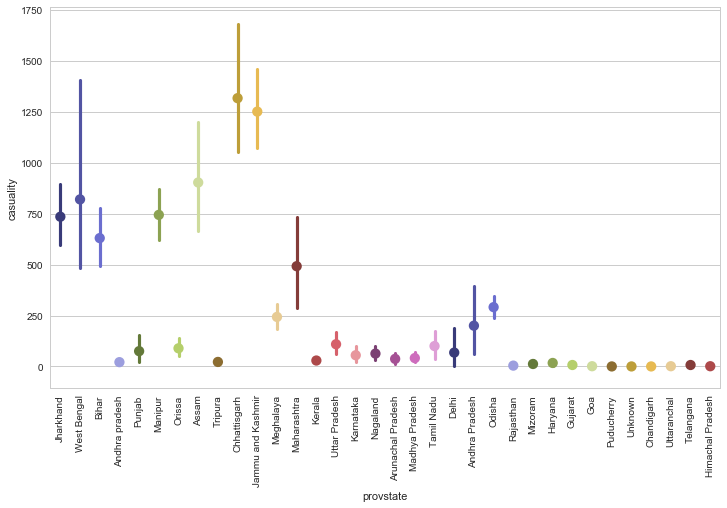

In [39]:
generalPointPlot('provstate','casuality', gta[(gta.country == 'India') & (gta.year.between(2010, 2016, inclusive=True))],"tab20b", np.sum)

** Conclusions **

** General Analysis **

- We obsevered that terrorist attack increase over the years in general
- year 2014 saw most terrorist attacks
- Top four countries who faced most terrorist attacks are ** Iraq, Pakistan, Afghanistan and India ** 
- ** Middle East & North Africa, South Aisa and South America ** were most vurnable to terrorist attacks
- Top three Weapon used in attacks were ** Bombing/Explosion, Armed Assault and Assassination **
- Year ** 2014, 2015 and 2016 ** faced more casuality

** Region based Analysis **

- In ** South Asia** region Top three country who faced attacks are ** Pakistan, Afghanistan and India **
- Top Three country who faaced more terrorist attacks ** Japan, China and Taiwan ** in ** East Asia **
- ** UK, Spain and France ** were most suffered from terrorist attack in  ** Western Europe **
- Terrorist most favourable country for attack in ** Middle East & North Africa ** region were ** Iraq, Turkey and Yemen **
- ** Colombia,  Peru and Chile ** were more vulnerable for terrorist attack in ** South America ** region
- Easily attackable country in ** Sub-Saharan Africa ** region were ** Somalia, Nigeria and South Africa **

** India Analysis **

- More Attack faced in year ** 2016, 2015, 2014 **
- ** Bombing/Explosion and Firearms ** most favourable weapon for attack
- Casuality in year ** 2006, 2008 and 1991 ** were more
- Most terrorist attcks at target place ** Private Citizen & Property, Police and Government **
- ** J&K, Assam and Punjab ** faced more casuality.
- Max number of terrorist attact in states ** J&K , Assam and Manipur **

** India 2010-16 Analysis **

- ** Bombing/Explosion, Armed Assault and Hostage Taking ** were attack done by terrorist
- ** Manipur, Chhattisgarh and J&K ** were most affected areas
- Most of casuality were in states ** J&K, Chhattisgarh and Assam **
- favourable weapon for attack were ** Bombing/Explosion and Firearms most favourable weapon for attack were ** 
